In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Fraud.csv')

# EDA Processing

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.shape

(6362620, 11)

In [8]:
df['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [9]:
df.drop(labels=['nameOrig','nameDest'],axis=1,inplace=True)

In [10]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [11]:
df.value_counts()

step  type      amount       oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
387   CASH_OUT  10000000.00  10000000.00    0.0             0.00            10000000.00     1        0                 4
617   CASH_OUT  10000000.00  10000000.00    0.0             0.00            10000000.00     1        0                 4
646   CASH_OUT  10000000.00  10000000.00    0.0             0.00            10000000.00     1        0                 3
44    PAYMENT   3976.34      0.00           0.0             0.00            0.00            0        0                 2
330   PAYMENT   2760.92      0.00           0.0             0.00            0.00            0        0                 2
                                                                                                                      ..
183   CASH_OUT  384188.12    10012.00       0.0             0.00            384188.12       0        0                 1
                384049.92    100763.0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

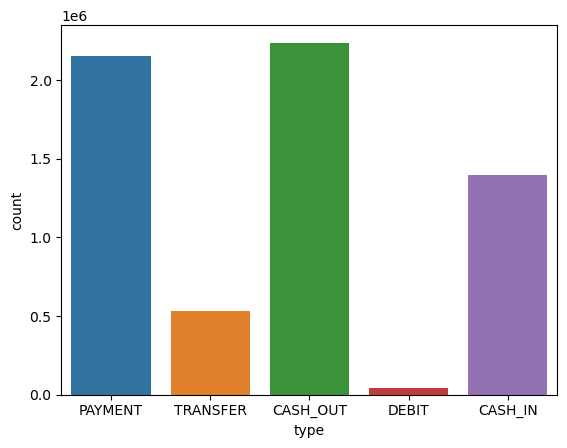

In [13]:
sns.countplot(df['type'])

In [14]:
#Most of the type used here is payment and cashout type

# Amount vs Type of transaction

Text(0, 0.5, 'Amount')

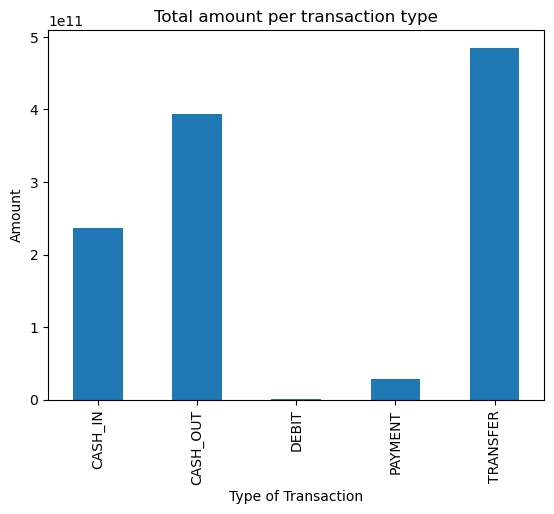

In [15]:
var = df.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount')

# BOX_plotting

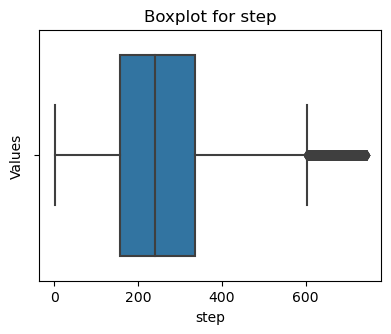

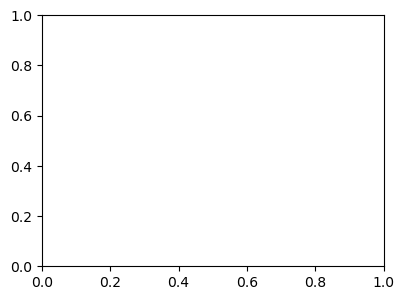

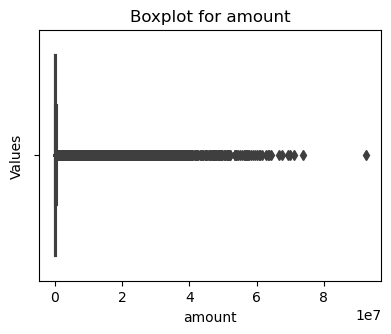

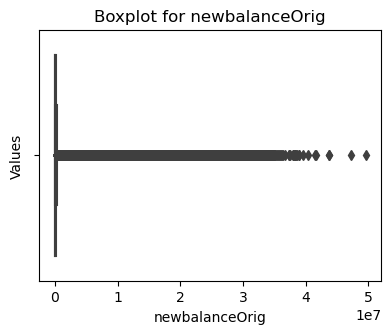

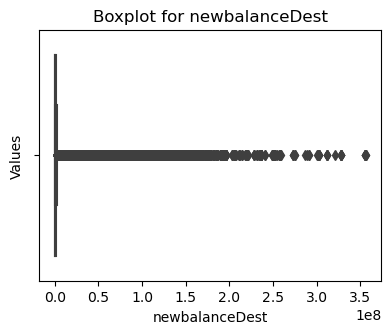

In [115]:
for i in range(len(df.columns)-1):
    plt.figure(figsize=(15, 15)) 
    plt.subplot(4, 3, i+1)  
    if df[df.columns[i]].dtype != 'object':
        sns.boxplot(x=df.columns[i], data=df)
        plt.title(f"Boxplot for {df.columns[i]}")
        plt.xlabel(df.columns[i])
        plt.ylabel('Values')
        plt.show()

In [116]:
# We are not taking any action on outliers

<AxesSubplot:>

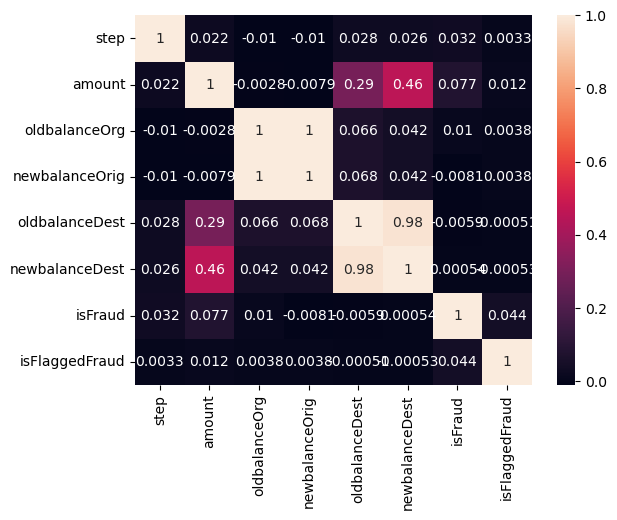

In [16]:
sns.heatmap(df.corr(),annot=True)

### As shown in fig there is high correlation between old balance org and new balance org and also there is also high correaltion in old balance dest and new balance dest

In [17]:
df.drop(df[['oldbalanceOrg','oldbalanceDest']],axis=1,inplace=True)

<AxesSubplot:>

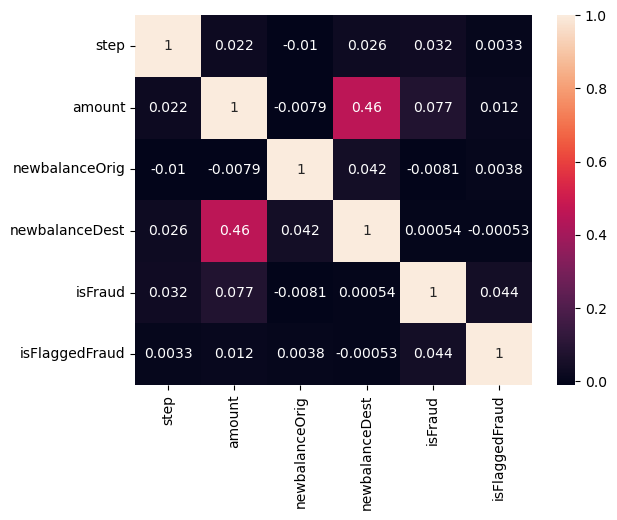

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
df.columns

Index(['step', 'type', 'amount', 'newbalanceOrig', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [20]:
fraud=df.loc[df.isFraud==1]
nonfraud=df.loc[df.isFraud==0]

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

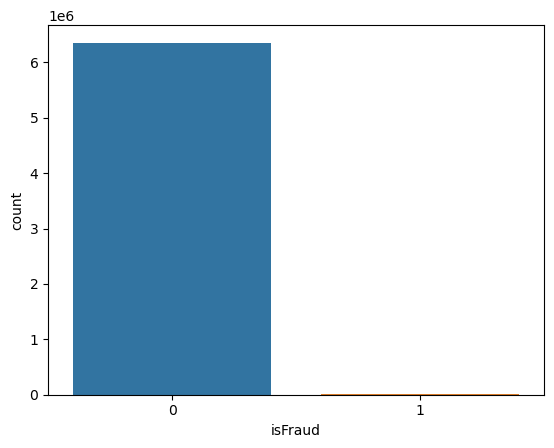

In [21]:
sns.countplot(df['isFraud'])

## The graph shows there is less amt of legitmate fraud

In [22]:
df.columns

Index(['step', 'type', 'amount', 'newbalanceOrig', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [23]:
fraud.count()

step              8213
type              8213
amount            8213
newbalanceOrig    8213
newbalanceDest    8213
isFraud           8213
isFlaggedFraud    8213
dtype: int64

In [24]:
piedata = fraud.groupby(['isFlaggedFraud']).sum()


In [25]:
piedata

,step,amount,newbalanceOrig,newbalanceDest,isFraud
isFlaggedFraud,,,,,
0,3017182,1.197863e+10,1.455035e+09,1.051024e+10,8197
1,8601,7.778556e+07,1.250859e+08,0.000000e+00,16


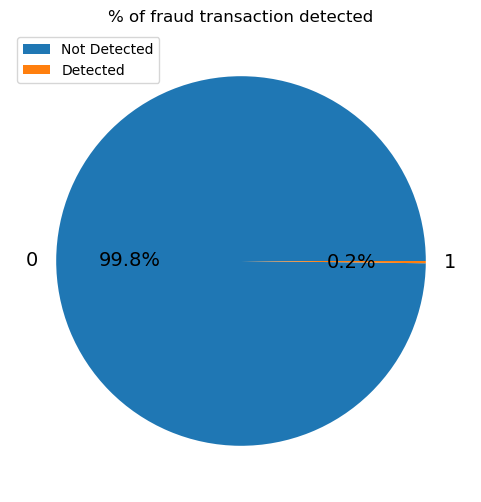

In [26]:
#Creating piechart for flagging 
f, axes = plt.subplots(1,1, figsize=(6,6))
axes.set_title("% of fraud transaction detected")
piedata.plot(kind='pie',y='isFraud',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%');
axes.set_ylabel('');
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

## Piechart there is only 0.2% has been flagged correctly in isFlaggedFraud
### so we remove isFlaggedFraud

In [27]:
fraud.type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

<AxesSubplot:xlabel='type', ylabel='count'>

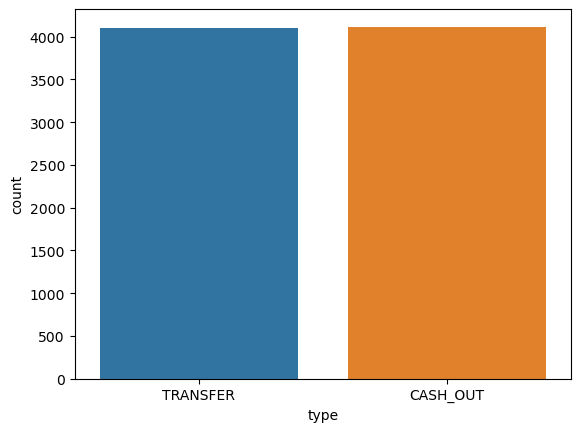

In [28]:
sns.countplot(x='type',data=fraud)


In [29]:
df.drop('isFlaggedFraud',axis=1,inplace=True)

# These are two columns which has most involved in most fraud case

In [30]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
enc=OneHotEncoder()

In [33]:
df

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,160296.36,0.00,0
1,1,PAYMENT,1864.28,19384.72,0.00,0
2,1,TRANSFER,181.00,0.00,0.00,1
3,1,CASH_OUT,181.00,0.00,0.00,1
4,1,PAYMENT,11668.14,29885.86,0.00,0
...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,0.00,6379898.11,1
6362618,743,TRANSFER,850002.52,0.00,0.00,1


In [34]:
df.isFraud.value_counts()/df.shape[0]*100

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

## As we can see it is imbalanced there are 99% values belongs to non-fraud and 0.12% which belongs to fraud 
## So we need to balance it

In [35]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [36]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [37]:
df

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,160296.36,0.00,0
1,1,PAYMENT,1864.28,19384.72,0.00,0
2,1,TRANSFER,181.00,0.00,0.00,1
3,1,CASH_OUT,181.00,0.00,0.00,1
4,1,PAYMENT,11668.14,29885.86,0.00,0
...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,0.00,6379898.11,1
6362618,743,TRANSFER,850002.52,0.00,0.00,1


In [38]:
x

array([[1, 'PAYMENT', 9839.64, 160296.36, 0.0],
       [1, 'PAYMENT', 1864.28, 19384.72, 0.0],
       [1, 'TRANSFER', 181.0, 0.0, 0.0],
       ...,
       [743, 'CASH_OUT', 6311409.28, 0.0, 6379898.11],
       [743, 'TRANSFER', 850002.52, 0.0, 0.0],
       [743, 'CASH_OUT', 850002.52, 0.0, 7360101.63]], dtype=object)

In [39]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


In [40]:
ct=ColumnTransformer(transformers=[('OneHot',OneHotEncoder(categories='auto'),[1])],remainder='passthrough')

In [41]:
x=ct.fit_transform(x)

In [42]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Assuming you have your feature matrix x and target vector y

# Define the oversampling and undersampling techniques
oversampler = SMOTE(sampling_strategy='auto', random_state=42)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Combine the oversampling and undersampling techniques in a pipeline
hybrid_sampler = [('over', oversampler), ('under', undersampler)]
hybrid = Pipeline(steps=hybrid_sampler)

# Apply the hybrid sampling on the dataset
x_resampled, y_resampled = hybrid.fit_resample(x, y)

In [43]:
sc=StandardScaler()

In [44]:
x_resampled=sc.fit_transform(x_resampled)

In [45]:
print(len(x_resampled))

12708814


In [46]:
print(len(y_resampled))

12708814


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=1)

# Model Building:

# LogisticRegression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,accuracy_score,classification_report

In [55]:
lr=LogisticRegression()

In [56]:
lr.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_pred_lr=lr.predict(x_test)

In [58]:
lr_acc_score=accuracy_score(y_pred_lr,y_test)

In [59]:
lr_acc_score

0.8406963985233871

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,accuracy_score,classification_report

In [60]:
def Evaluation(x,y):
    print("Accuracy Score")
    print(accuracy_score(x,y))
    print()
    print("Confusion Matrix \n")
    print(confusion_matrix(x,y))
    print()
    print("Classification Report \n")
    print(classification_report(x,y))

In [61]:
Evaluation(y_pred_lr,y_test)

Accuracy Score
0.8406963985233871

Confusion Matrix 

[[1009405  143828]
 [ 261084 1127446]]

Classification Report 

              precision    recall  f1-score   support

           0       0.79      0.88      0.83   1153233
           1       0.89      0.81      0.85   1388530

    accuracy                           0.84   2541763
   macro avg       0.84      0.84      0.84   2541763
weighted avg       0.84      0.84      0.84   2541763



# DecisionTree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dtc=DecisionTreeClassifier(criterion='entropy',random_state=0,class_weight='balanced')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=0)

In [64]:
y_pred_dtree=dtc.predict(x_test)

In [65]:
d_tree_score=accuracy_score(y_pred_dtree,y_test)

In [66]:
Evaluation(y_pred_dtree,y_test)

Accuracy Score
0.9963965955913278

Confusion Matrix 

[[1264821    3491]
 [   5668 1267783]]

Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1268312
           1       1.00      1.00      1.00   1273451

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [69]:
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [70]:
y_pred_rf=classifier.predict(x_test)

In [71]:
rf_score=accuracy_score(y_pred_rf,y_test)

In [72]:
Evaluation(y_pred_rf,y_test)

Accuracy Score
0.9935513263825149

Confusion Matrix 

[[1260362    6264]
 [  10127 1265010]]

Classification Report 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99   1266626
           1       1.00      0.99      0.99   1275137

    accuracy                           0.99   2541763
   macro avg       0.99      0.99      0.99   2541763
weighted avg       0.99      0.99      0.99   2541763



# KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
classifier2=KNeighborsClassifier(n_neighbors=5)
classifier2.fit(x_train,y_train)

KNeighborsClassifier()

In [74]:
y_pred_knn=classifier2.predict(x_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [76]:
knn_score=accuracy_score(y_pred_knn,y_test)

In [77]:
Evaluation(y_pred_knn,y_test)

Accuracy Score
0.9722987548406362

Confusion Matrix 

[[1231229   31150]
 [  39260 1240124]]

Classification Report 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97   1262379
           1       0.98      0.97      0.97   1279384

    accuracy                           0.97   2541763
   macro avg       0.97      0.97      0.97   2541763
weighted avg       0.97      0.97      0.97   2541763



# Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [79]:
y_pred_NB=model.predict(x_test)

In [80]:
NB_score=accuracy_score(y_pred_NB,y_test)

In [81]:
Evaluation(y_pred_NB,y_test)

Accuracy Score
0.7825761095743388

Confusion Matrix 

[[ 718138     289]
 [ 552351 1270985]]

Classification Report 

              precision    recall  f1-score   support

           0       0.57      1.00      0.72    718427
           1       1.00      0.70      0.82   1823336

    accuracy                           0.78   2541763
   macro avg       0.78      0.85      0.77   2541763
weighted avg       0.88      0.78      0.79   2541763



# ROC

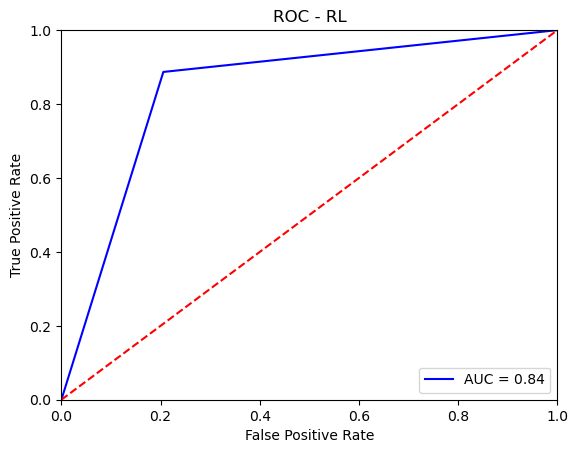

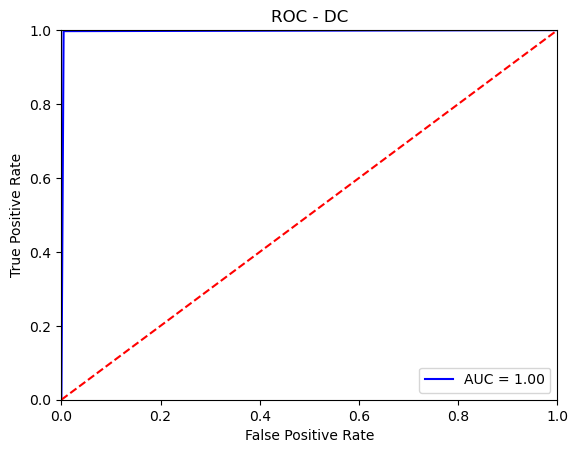

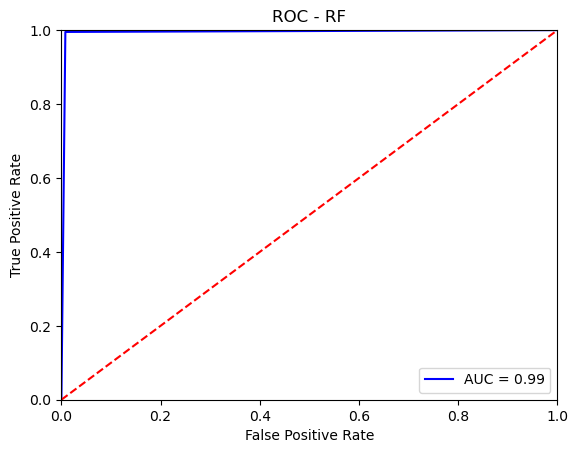

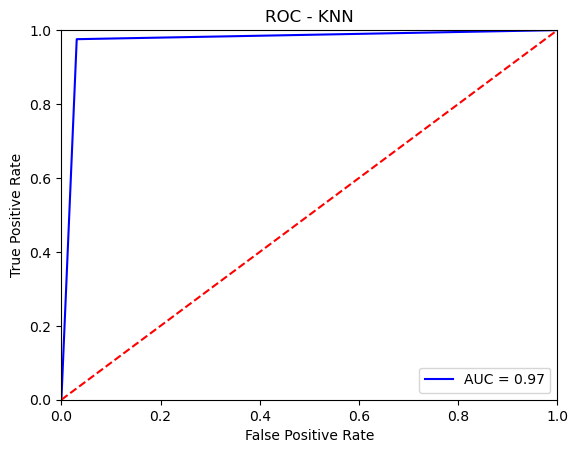

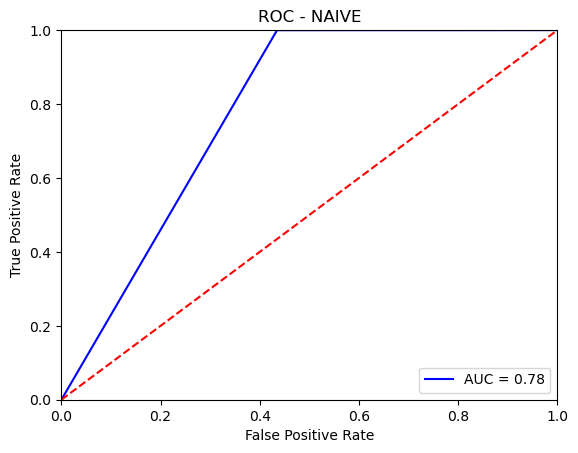

In [84]:
import sklearn.metrics as metrics

# AUC ROC - Logistic Regression

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_lr)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RL')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - Decision Tree

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_dtree)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - Random forest Tree

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - KNN

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_knn)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - NAIVE BAYES

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_NB)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - NAIVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [85]:
#Evaluation Metric

In [91]:
model_acc={'model_name':['Logistic Regression','Decision Tree','Random Forest','KNN','Naive Bayes'],'Acc':[lr_acc_score,d_tree_score,rf_score,knn_score,NB_score]}

In [107]:
ne_f=pd.DataFrame(model_acc)

In [109]:
ne_f=ne_f.sort_values(by='Acc')

In [110]:
ne_f

,model_name,Acc
4,Naive Bayes,0.782576
0,Logistic Regression,0.840696
3,KNN,0.972299
2,Random Forest,0.993551
1,Decision Tree,0.996397


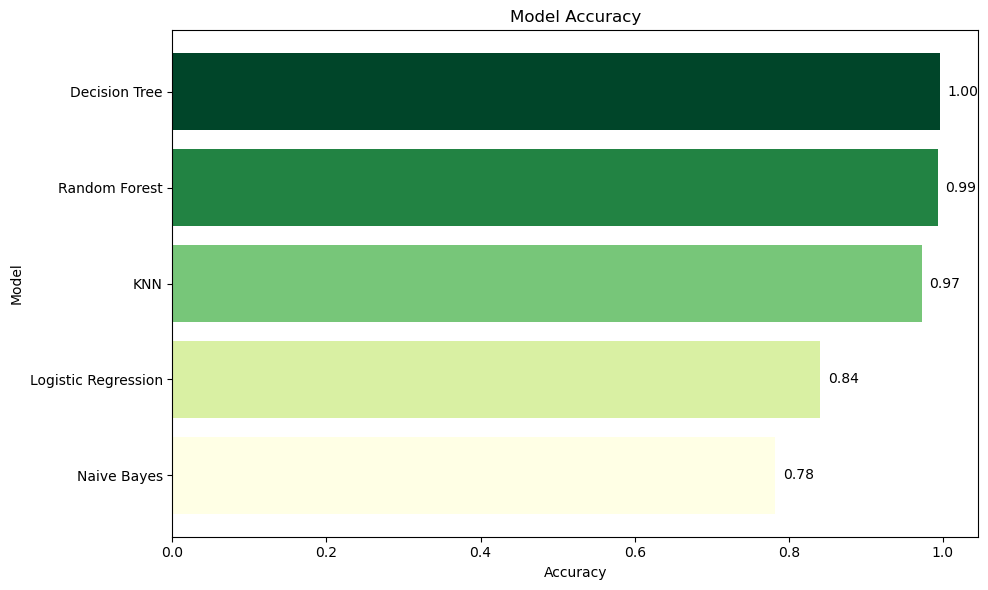

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names and accuracy values
models = ne_f['model_name']
accuracy = ne_f['Acc']

# Create a color map based on accuracy values
colors = plt.cm.YlGn(np.linspace(0, 1, len(accuracy)))

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(models, accuracy, color=colors)
a
# Add labels and a title
ax.set_xlabel('Accuracy')
ax.set_ylabel('Model')
ax.set_title('Model Accuracy')

# Add annotations showing the accuracy values on the bars
for bar, acc in zip(bars, accuracy):
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
            f'{acc:.2f}', ha='left', va='center')

# Show the plot
plt.tight_layout()
plt.show()